Quantitative X-Ray Imaging: Tutorial 01  
Julia Herzen, Franziska Hinterdobler, Sara Savatović, Sami Wirtensohn

# Image manipulation

Verify that you can load and plot an image successfully using the Python libraries `numpy` (for n-dimensional array manipulations), `scipy` (for image processing) and `matplotlib` (for plotting and visualization).

Import the packages at the very beginning of the notebook and set image visualization parameters. You may have to install them into your environment. For help on the ScaleBar function, check out the [documentation](https://github.com/ppinard/matplotlib-scalebar/blob/master/README.md):

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi


%matplotlib inline
# alternatively (requires package ipympl):
# %matplotlib widget
# or
# %matplotlib qt

matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.dpi'] = 100

List the current directory and load the image with `plt.imread` and visualize it with `plt.imshow`.

In [3]:
img = plt.imread('./melanoma_cells.jpg')

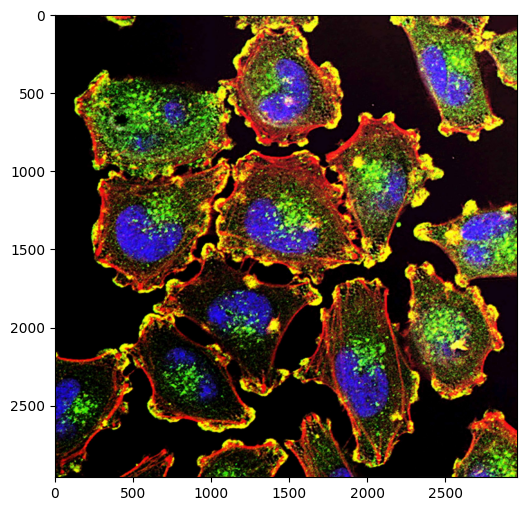

In [4]:
plt.imshow(img)

## Part 1: Subplots, colorbar and scalebar

Knowing that the image is indexed as `(rows, columns, channels)`, separate the 3 image channels and show them each with a colorbar. Hide the axis and add a scalebar knowing that the pixel size is $15\,\mathrm{nm}$.<br>
* `plt.figure()` initializes a new figure and returns a Figure object, which serves as a container for all the plot elements.<br>
* `plt.tight_layout()` is used to automatically adjust subplot parameters to make sure the plot elements fit into the figure area without overlapping.

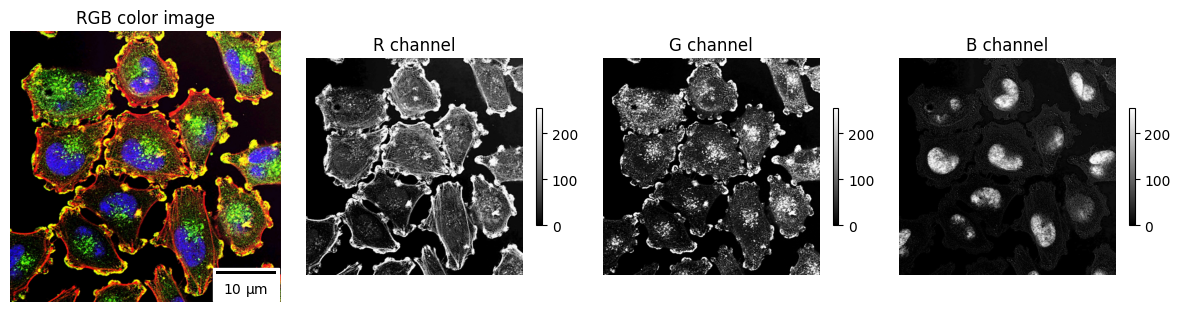

In [5]:
px = 15e-9

plt.figure(figsize=(12,5))

plt.subplot(1,4,1)
plt.title('RGB color image')
plt.imshow(img)
plt.axis('off')
scalebar = ScaleBar(px, "m", length_fraction=0.3, location='lower right')
plt.gca().add_artist(scalebar)

plt.subplot(1,4,2)
plt.title('R channel')
plt.imshow(img[..., 0])
plt.axis('off')
plt.colorbar(shrink=0.25)

plt.subplot(1,4,3)
plt.title('G channel')
plt.imshow(img[..., 1])
plt.axis('off')
plt.colorbar(shrink=0.25)

plt.subplot(1,4,4)
plt.title('B channel')
plt.imshow(img[..., 2])
plt.axis('off')
plt.colorbar(shrink=0.25)

plt.tight_layout()

Metastatic Melanoma Cells. Cell nuclei (blue), actin (red), and an actin regulator (green).

## Part 2: Slicing and cropping

Check the file type, dimension and shape.

In [6]:
type(img), type(img[0,0,0])

(numpy.ndarray, numpy.uint8)

In [7]:
img.ndim

3

In [8]:
img.shape

(2960, 2960, 3)

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The shape indicates the number of grid elements along each dimension. 
For a 2D image these are the number of pixels in the vertical and horizontal direction.<br>
In our case, the image has 3 dimensions, the last dimension contains the information about the red, green and blue (RGB) channels. 

In [9]:
imgR = img[:, :, 0].copy()
imgG = img[:, :, 1].copy()
imgB = img[:, :, 2].copy()

Crop the top right corner of the G channel image and show the cropped $500\times350$ region-of-interest (ROI). Remember that indexing follows the order top-bottom and left-right (see image axis).

In [10]:
img_crop = imgG[0:500, 2960-500:2960].copy()

This is equivalent to:

In [11]:
img_crop1 = img[0:500, -500:, 1].copy()

Check that they are equivalent and look at their difference.

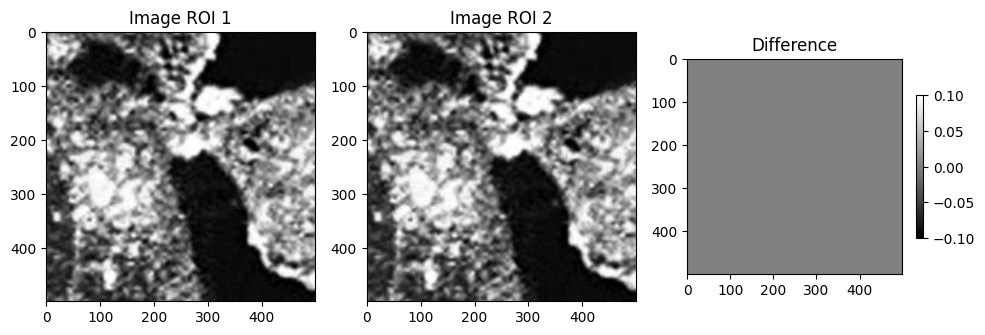

In [12]:
plt.figure()

plt.subplot(131)
plt.title('Image ROI 1')
plt.imshow(img_crop)

plt.subplot(132)
plt.title('Image ROI 2')
plt.imshow(img_crop1)

plt.subplot(133)
plt.title('Difference')
plt.imshow(img_crop1-img_crop)
plt.colorbar(shrink=0.25)

plt.tight_layout()

## Part 3: Gray levels and histograms

Check the minimum and maximum gray level in the R channel image.

In [13]:
imgR.min(), imgR.max()

(np.uint8(0), np.uint8(255))

The numpy array elements are unsigned 8-bit integers (type: `numpy.uint8`), this means each value can be represented using 8 bits, allowing for integer values in the range [0,255].

Look at gray value histograms of the flattened arrays for the 3 image channels using ``plt.hist``.

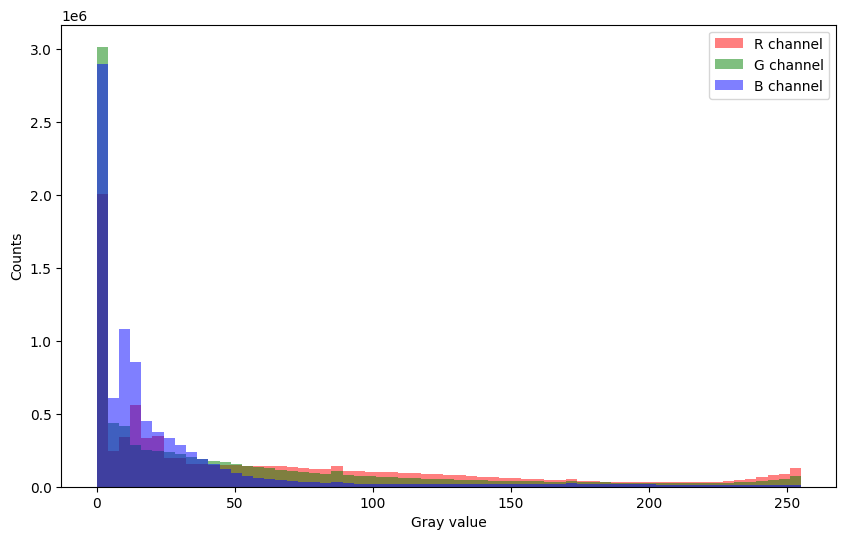

In [14]:
plt.figure()
plt.hist(imgR.ravel(), bins=np.linspace(0,255,64), label='R channel', color='r', alpha=0.5)
plt.hist(imgG.ravel(), bins=np.linspace(0,255,64), label='G channel', color='g', alpha=0.5)
plt.hist(imgB.ravel(), bins=np.linspace(0,255,64), label='B channel', color='b', alpha=0.5)
plt.ylabel('Counts')
plt.xlabel('Gray value')
plt.legend()

It can be noted that most of the pixels in the B channel image have gray values in the interval [0,75]. It is useful to use this information for a better visualization of image features. We can window the image by setting a minimum `vmin` an maximum  `vmax` gray level in `plt.imshow`.

However, in the central plot we can't see detailed information of the cell nuclei because they are saturated (all the values $>75$ are white). Be careful not to lose image features because of bad windowing. 
Threshold the image with $>75$ to obtain a mask of pixel values that are saturated and show it along the both other images. 

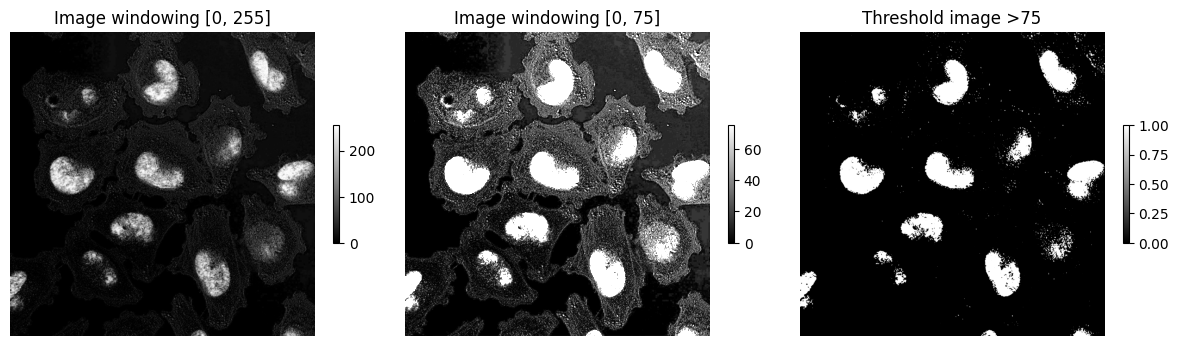

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(131)
plt.title('Image windowing [0, 255]')
plt.imshow(imgB)
plt.axis('off')
plt.colorbar(shrink=0.25)

plt.subplot(132)
plt.title('Image windowing [0, 75]')
plt.imshow(imgB, vmin=0, vmax=75)
plt.axis('off')
plt.colorbar(shrink=0.25)

# Crate a mask by tresholding the image
mask = imgB>75

plt.subplot(133)
plt.title('Threshold image >75')
plt.imshow(mask)
plt.axis('off')
plt.colorbar(shrink=0.25)

plt.tight_layout()

To automatically window an image, we can define a function that uses `np.percentile`.

In [16]:
def imsh(img, p=5):
    plt.imshow(img, vmin=np.percentile(img,p), vmax=np.percentile(img,100-p))

Plot a line through the center of the B channel image horizontally and vertically. Show the image with `imsh`, the lines can be visualized on top of the image with `plt.axhline` and `plt.axvline`.

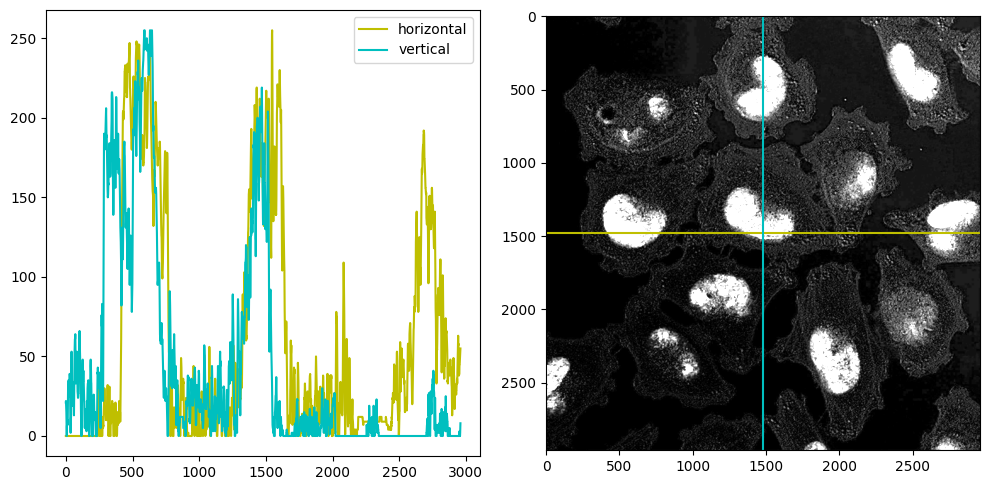

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(imgB[1480], label='horizontal', color='y')
plt.plot(imgB[:,1480], label='vertical', color='c')
plt.legend()

plt.subplot(122)
imsh(imgB)
plt.axhline(1480, color='y')
plt.axvline(1480, color='c')

plt.tight_layout()

## Part 4: Image rotation & blurring

Rotate the R channel image by 45 degrees using `ndi.rotate`, and compare the result to the original image by visualizing them in adjacent subplots. Set `reshape=False`, otherwise the size of the rotated image will change (feel free to try it with `True`as well). 

In [18]:
ndi.rotate?

Signature:
ndi.rotate(
    input,
    angle,
    axes=(1, 0),
    reshape=True,
    output=None,
    order=3,
    mode='constant',
    cval=0.0,
    prefilter=True,
)
Docstring:
Rotate an array.

The array is rotated in the plane defined by the two axes given by the
`axes` parameter using spline interpolation of the requested order.

Parameters
----------
input : array_like
    The input array.
angle : float
    The rotation angle in degrees.
axes : tuple of 2 ints, optional
    The two axes that define the plane of rotation. Default is the first
    two axes.
reshape : bool, optional
    If `reshape` is true, the output shape is adapted so that the input
    array is contained completely in the output. Default is True.
output : array or dtype, optional
    The array in which to place the output, or the dtype of the
    returned array. By default an array of the same dtype as input
    will be created.
order : int, optional
    The order of the spline interpolation, default is 3.
    T

In [20]:
imgR_rot = ndi.rotate(imgR, angle=45, reshape=False)

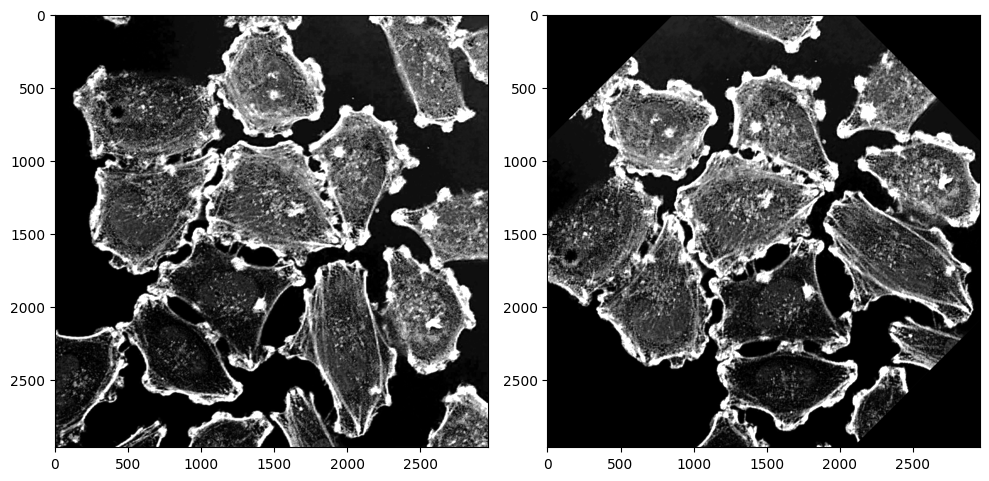

In [21]:
plt.figure()
plt.subplot(121)
imsh(imgR)

plt.subplot(122)
imsh(imgR_rot)

plt.tight_layout()

Blur the rotated image with a Gaussian filter `ndi.gaussian_filter` with `sigma=10`. Take the difference of the two images and show them.

In [22]:
imgR_rot_blur = ndi.gaussian_filter(imgR_rot, sigma=10)

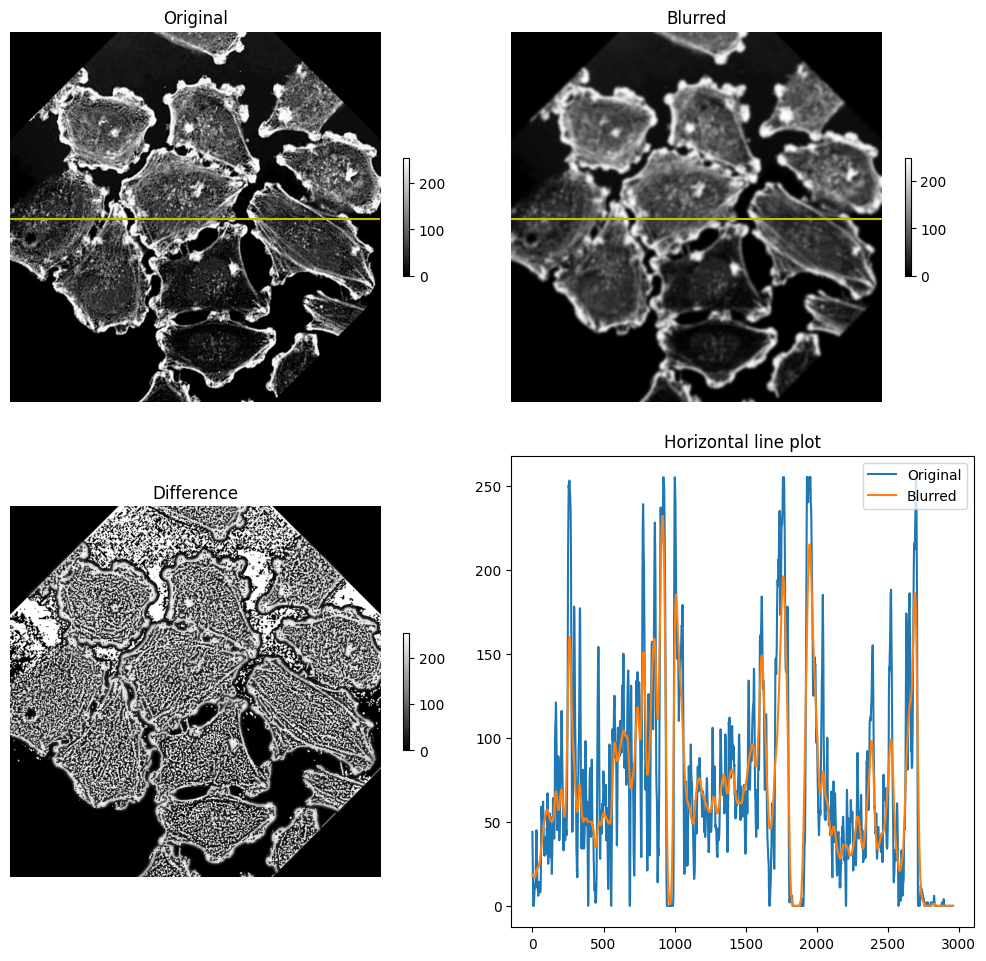

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Original')
imsh(imgR_rot, 0)
plt.axhline(1500, c='y')
plt.axis('off')
plt.colorbar(shrink=0.25)

plt.subplot(222)
plt.title('Blurred')
imsh(imgR_rot_blur, 0)
plt.axhline(1500, c='y')
plt.axis('off')
plt.colorbar(shrink=0.25)

plt.subplot(223)
plt.title('Difference')
imsh(imgR_rot_blur-imgR_rot)
plt.axis('off')
plt.colorbar(shrink=0.25)

plt.subplot(224)
plt.title('Horizontal line plot')
plt.plot(imgR_rot[1500], label='Original')
plt.plot(imgR_rot_blur[1500], label='Blurred')
plt.legend()

plt.tight_layout()